# Основы статистики

---

## Математическое ожидание
Наиболее ожидаемое значение при многократном повторении испытаний

$$\mu = \frac{\sum x}{n}$$



## Дисперсия
Показывает рассеивание данных

Позволяет численно определить как далеко расходятся или рассеиваются значения от математического ожидания

$$D = \frac{\sum(x-\mu)^2}{n}$$



## Стандартное отклонение

Интерпретация дисперсии (приведение к масштабу исходных данных)

$$\sigma = \sqrt{D} = \sqrt\frac{\sum(x-\mu)^2}{n}$$

## Правило трех сигм (3-sigma rule)

Правило, утверждающее, что для любой случайной величины $\epsilon$
 с конечной дисперсией вероятность того, что случайная величина отклонится от своего математического ожидания не менее, чем на три среднеквадратических отклонения $\sigma$, не более  $\frac{1}{9}$

$$P (|\epsilon - M[\epsilon]|\ge3\sigma)\le\frac{1}{9}$$


https://wiki.loginom.ru/articles/3-sigma-rule.html


![](https://wiki.loginom.ru/images/3-sigma.svg)

На рисунке видно, что в пределах одного среднеквадратического отклонения лежит 68,26% значений, принимаемых нормально распределенной случайной величиной (соответствует доли площади под кривой распределения). В пределах двух среднеквадратических отклонений — уже 95,44%, а в пределах трех — 99,72%. Это означает, что вероятность того, что случайная величина примет значение, отклоняющееся от математического ожидания больше чем на три среднеквадратических отклонения, не превышает 0,28%, т.е. пренебрежимо мала.

### ЗБЧ

Закон больших чисел (ЗБЧ) в теории вероятностей — принцип, описывающий результат выполнения одного и того же эксперимента много раз. Согласно закону, среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения.

Другими словами, чем больше объём выборки / чем чаще проводятся измерения какого-либо параметра, тем выше вероятность, что результаты окажутся близки к ожидаемым.

Закон больших чисел важен, поскольку он гарантирует устойчивость для средних значений некоторых случайных событий при достаточно длинной серии экспериментов.

Важно помнить, что закон применим только тогда, когда рассматривается большое количество испытаний.

### Стандартная ошибка среднего

Стандартная ошибка среднего – позволяет оценить степень доверия расчёта среднего по
выборке. А ещё дальше – позволяет оценивать степень доверия к выводам при проверке гипотез.
Например, при сравнении средних значений у двух групп

$$S_\bar x = \frac {S}{\sqrt n}$$

$\frac {p}{\sigma}$ – стандарт отклонения/ уровень дисперсии (разброса), который
мы ожидаем от собранной информации.  

$H$ - предел погрешности. Определяет, сколько места для ошибки мы
готовы допустить. Другими словами, какую разницу допускаем между
средним значением выборки и средним значением генеральной
совокупности. Т.е. для первой задач - это не что иное, как «стандартная
ошибка среднего».

Формулы для расчёта выборок

$z$ – доверительный уровень. Он показывает, насколько вы уверены, что
фактическое среднее значение будет находиться в пределах выбранной
вами погрешности. Большинство исследователей выбирают уровни
уверенности 90%, 95% или 99%. Заданный вами уровень доверия затем
соответствует $Z$-score, или постоянному значению, которое необходимо
для уравнения размера выборки. Вот $Z$-коэффициенты для этих трех
наиболее распространенных уровней доверия:

# Метрики машинного обучения
---

In [ ]:
# @title
# Import labraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

plt.style.use('dark_background')
cm = sns.dark_palette("purple", as_cmap=True)

In [ ]:
# @title
# Fixed random / the answer to everything
RANDOM_STATE = 42

## Регрессия

---

### MSE - Mean Squared Error

Cообщает нам среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже $MSE$, тем лучше модель соответствует набору данных.

$$MSE(y^{true}, y^{pred}) = \frac{1}{N} \sum_{i=1}^N (y_{i} - f(x_{i}))^2$$

### RMSE - Root Squared Error

чтобы показатель эффективности $MSE$ имел размерность исходных данных, из него извлекают квадратный корень и получают показатель эффективности $RMSE$ (Root Mean Squared Error).
  
$$RMSE = \sqrt {MSE}$$

  
Имеется небольшая разница между этими двумя ошибками при оптимизации с использованием градиента.
Перемещение по градиенту $MSE$ эквивалентно перемещению по градиенту $RMSE$, но с другой скоростью, и скорость зависит от самой оценки $MSE$.
Таким образом, хотя $RMSE$ и $MSE$ близки с точки зрения оценки моделей, они не являются взаимозаменяемыми при использовании градиента для оптимизации.
Влияние каждой ошибки на $RMSE$ пропорционально величине квадрата ошибки. Поэтому большие ошибки оказывают непропорционально большое влияние на $RMSE$.
Следовательно, $RMSE$ можно считать чувствительной к аномальным значениям.



Реализуем расчет метрики на синтетических данных и посмотрим на готовую функцию библиотеки scikit-learn

In [ ]:
# Set parameters for generating random data
mean_target = 300  # Mean value for the target feature
std_target = 4   # Standard deviation for the target feature

mean_prediction = 250  # Mean value for predictions
std_prediction = 33    # Standard deviation for predictions

# Generate random data
np.random.seed(RANDOM_STATE)  # Set seed for result reproducibility
num_samples = 5      # Number of data samples

# Generate random values for the target feature and predictions
target_values = np.random.normal(mean_target, std_target, num_samples)
predicted_values = np.random.normal(mean_prediction, std_prediction, num_samples)

data = pd.DataFrame({'name': ['Sasha', 'Kosmos', 'Pchela', 'Phill', 'Pharhad'],
                     'kickbacks_business': target_values,
                     'kickbacks_pred': predicted_values})

In [ ]:
data

,name,kickbacks_business,kickbacks_pred
0,Sasha,301.986857,242.273480
1,Kosmos,299.446943,302.114023
2,Pchela,302.590754,275.325346
3,Phill,306.092119,234.507345
4,Pharhad,299.063387,267.904481


In [ ]:
# Implementation of Mean Squared Error (MSE)
def mean_squared_error_manual(y_true, y_pred):
    """
    Calculation of Mean Squared Error (MSE)

    Args:
        y_true (array-like): The true values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean squared error between y_true and y_pred.
    """
    # Calculate the difference between the true values and the predicted values
    error = y_true - y_pred

    # Square the differences
    squared_error = error ** 2

    # Sum the squared errors
    mse = np.sum(squared_error)

    # Divide the sum by the number of data samples (length of the array)
    mse /= len(y_true)

    return mse

In [ ]:
# Our function to calculate MSE
mse_value = mean_squared_error_manual(
    data['kickbacks_business'],
    data['kickbacks_pred']
)
print(mse_value)

2082.29206946291


In [ ]:
# RMSE
np.sqrt(mse_value)

45.6321385589467

In [ ]:
# Mean squared error in scikit-learn
from sklearn.metrics import mean_squared_error

mean_squared_error(data['kickbacks_business'], data['kickbacks_pred'])

2082.29206946291

In [ ]:
# RMSE in scikit-learn
rmse = mean_squared_error(data['kickbacks_business'],
                          data['kickbacks_pred'],
                          squared=False)
print(rmse)

45.6321385589467


### MSPE - Mean Squared Percentage Error

Также можно вывести значение в процентах, в случае слишком большого разброса значений

In [ ]:
# Implementation of Mean Squared Percentage Error (MSPE)
def mspe_manual(y_true, y_pred):
    """
    Calculation of Mean Squared Percentage Error (MSPE)

    Args:
        y_true (array-like): The true values.
        y_pred (array-like): The predicted values.

    Returns:
        float: Value of MSPE.
    """
    mspe = np.sum(((y_true - y_pred) ** 2) / (y_true ** 2)) / len(y_true)
    return mspe

In [ ]:
mspe_manual(data['kickbacks_business'], data['kickbacks_pred'])

0.022569304306818812

Проблемой при использовании $MSPE$ является то, что, если наблюдаемое значение выходной переменной равно 0, значение ошибки становится неопределённым.

$MSPE$ можно рассматривать как взвешенную версию $MSE$, где вес обратно пропорционален квадрату наблюдаемого значения. Таким образом, при возрастании наблюдаемых значений ошибка имеет тенденцию уменьшаться.

# Регуляризация

---

Регуляризация - техника для контроля переобучения модели.  
Она представляет собой добавление дополнительного члена (штрафа) к функции потерь, который зависит от параметров модели. Целью регуляризации является уменьшение сложности модели и улучшение ее обобщающей способности.

Одним из ключевых элементов регуляризации является использование нормы вектора, которая измеряет длину вектора в пространстве параметров модели. Для этого обычно используют L1 и L2 нормы, которые являются двумя наиболее распространенными типами норм.

---

Норма вектора $||x||$ - мера длины вектора, любая функция $f:\mathbb{R} n \rightarrow \mathbb{R}$, которая удовлетворяет условиям:


+ Неотрицательность: Для всех векторов $x \in \mathbb{R}^n$, значение нормы $f(x)$ всегда неотрицательно или равно нулю. То есть $f(x) \ge 0$.

+ Положительная определенность: Значение нормы равно нулю только тогда, когда вектор $x$ является нулевым вектором (вектором с нулевыми элементами). То есть $f(x) = 0$ тогда и только тогда, когда $x = 0$.

+ Однородность: Значение нормы функции от скалярного произведения вектора $x$ и числа $t$ равно модулю числа $t$ умноженному на значение нормы $f(x)$. Формально: $f(tx) = |t|f(x)$ для любого вектора $x \in \mathbb{R}^n$ и числа $t \in \mathbb{R}$.

+ Неравенство треугольника: Для любых векторов $x, y \in \mathbb{R}^n$, значение нормы суммы векторов не превосходит суммы значений норм отдельных векторов. Формально: $f(x + y) \leq f(x) + f(y)$.

## L2 - норма

---

L2 норма измеряет квадратный корень из суммы квадратов элементов вектора.  
Она часто применяется в Ridge регрессии и называется также Евклидовой нормой.

---

## L1

---

L1 норма (манхэттенская норма, абсолютная норма) измеряет сумму абсолютных значений элементов вектора  
Позволяет измерить "расстояние" от начала координат до точки, заданной вектором x
  $$||x||_{L_1} = \sum_{i=1}^n |x_i|$$




L1 регуляризация (также известная как LASSO регуляризация) - это техника для контроля переобучения моделей путем добавления штрафа на сумму абсолютных значений весов модели к функции потерь.  
Для линейных моделей, L1 регуляризация представляет собой добавление L1 нормы вектора весов умноженных на коэффициент регуляризации ($\alpha$ или $\lambda$) к функции потерь.   
Чем больше значение $\alpha$, тем сильнее регуляризация и больше весов модели будет установлено точно равными нулю, то есть устанавливает малые коэффициенты равными нулю и добавляет штрафы для больших.

$$J(w) = \frac{1}{2n||y - X_w||^2} + \alpha||w||_1$$

+ $J(w)$ - целевая функция
+ n - количество объектов в датасете
+ X, y - матрица признаков и целевой признак
+ $w$ - весовые коэффициенты
+ $X_w$ = матрица полученная умножением матрицы признаков на вектор параметров $w$
+ $\alpha$ - штраф контролирующий силу регуляризации

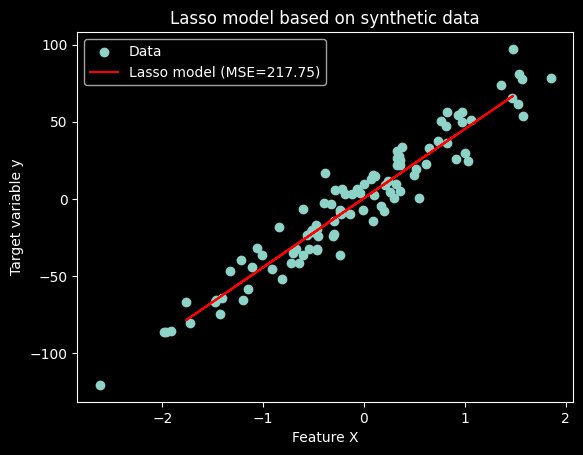

In [ ]:
# Creating synthetic data
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    noise=13,
    random_state=RANDOM_STATE
)

# Divide the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y,
                                                    test_size=0.1,
                                                    random_state=42)

# Creating a Lasso model with alpha=0.01
lasso_model = Lasso(alpha=0.01)

# Training the model on a training sample
lasso_model.fit(X_train, y_train)

# We get predictions on the test sample
y_pred = lasso_model.predict(X_test)

# Calculate the standard deviation (MSE)
mse = mean_squared_error(y_test, y_pred)

# Visualization of the data and the result of the model
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label=f'Lasso model (MSE={mse:.2f})')
plt.xlabel('Feature X')
plt.ylabel('Target variable y')
plt.title('Lasso model based on synthetic data')
plt.legend()
plt.show()

In [ ]:
np.sqrt(mse)

14.756434520382223

In [ ]:
results = pd.DataFrame({
     'target': y_test,
     'predict': y_pred,
     'loss': np.abs(y_test - y_pred)
})

In [ ]:
(
    results.sort_values(
                        by=['loss'],
                        ascending=False)
           .style.background_gradient(cmap=cm))

,target,predict,loss
1,97.236412,66.759971,30.476441
5,5.924617,-12.609706,18.534323
3,-2.774601,-17.113500,14.338900
9,54.352111,42.243204,12.108907
0,-47.001820,-59.098532,12.096713
6,-32.343693,-20.415581,11.928111
7,-66.747410,-78.602640,11.855230
2,47.557238,36.916828,10.640410
4,-6.979615,-10.028901,3.049287
8,36.203319,37.337392,1.134073


Также с помощью модели Lasso можно отобрать важные признаки

Посмотрим реализацию feature_importance с помощью модели Lasso

In [ ]:
# Creating synthetic data
np.random.seed(RANDOM_STATE)
X = np.random.rand(100, 5)  # Feature matrix (100 examples, 5 features)
y = 3 * X[:, 0] + 2 * X[:, 1] - 4 * X[:, 2] + np.random.normal(0, 0.2, 100)  # Target variable with noise

# Creating a Lasso model with alpha=0.01
lasso_model = Lasso(alpha=0.01)

# Training the model on data
lasso_model.fit(X, y)

# We get the values of weights (coefficients) for each attribute
feature_importance = lasso_model.coef_

# Output "feature importance" for each attribute
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

Feature 1: 2.841097165969177
Feature 2: 1.7794518695655288
Feature 3: -3.7950950740833815
Feature 4: 0.0
Feature 5: -0.0


Как мы можем наблюдать:
+ первые два признака положительно влияют на предсказание модели, чем больше значение признака, тем большее значение целевой переменной предсказывает модель
+ Третий признак отрицательно влияет на предсказание модели, большие значения признака приводят к уменьшению предсказанных значений
+ Последние два признака имеют коэффициенты 0.0 и это указывает на то, что они были обнулены и исключены из модели

Таким образом мы можем исключать "не важные" признаки, если нам необходимо отобрать влияющие на предсказание модели признаки

## $R^2$ - коэффициент детерминации

---

R-squared измеряет насколько хорошо модель соответствует данным и объясняет изменчивость зависимой переменной

Значение $R^2$ находятся в диапазоне 0 до 1 (в некоторых случаях -$\infty$) и может быть интерпретировано следующим образом:

+ $R^2 = 0$: Модель не объясняет никакой изменчивости в данных и предсказанные значения не лучше, чем просто среднее значение целевой переменной
+ $R^2 = 1$: Модель идеально соответствует данным и объясняет всю изменчивость в зависимой переменной
+ $R^2 < 0:$ Ответы модели не идут в соответствии с дисперсией выборки, сильное отклонение от истинных значений  

Формально $R^2$ определляется как отношение объясненной дисперсии (или $MSE$) к общей дисперсии(или $MSE$ константной модели):

$$R^2 = 1 - \frac{\frac{1}{n}\sum_{i}^n (y_i - \hat{y_i})^2}{\frac{1}{n}\sum_{i}^{n} (y_i - \bar{y})^2}$$

Где:
+ $y_i$ - реальное значение целевой переменной для $i$-ного наблюдения
+ $\hat{y_i}$ - предсказанное значение целевой переменной для i-го наблюдения
+ $\bar{y}$ - среднее значение целевой переменной для всех наблюдений ($\mu$ мат. ожидание)
+ $n$ - общее количество наблюдений

# Доработать пример для наглядности регуляризации

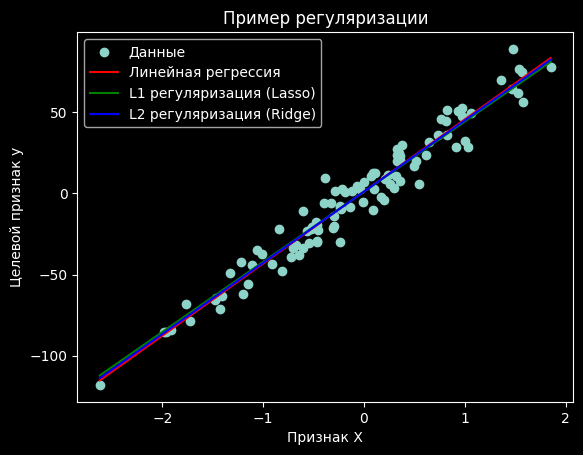

In [ ]:
# Генерируем случайные данные для примера
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Создаем модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X, y)

# Создаем модель L1 регуляризации (Lasso)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X, y)

# Создаем модель L2 регуляризации (Ridge)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Генерируем значения для предсказания моделей
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_linear = linear_model.predict(X_fit)
y_lasso = lasso_model.predict(X_fit)
y_ridge = ridge_model.predict(X_fit)

# Визуализация результатов
plt.scatter(X, y, label="Данные")
plt.plot(X_fit, y_linear, label="Линейная регрессия", color='r')
plt.plot(X_fit, y_lasso, label="L1 регуляризация (Lasso)", color='g')
plt.plot(X_fit, y_ridge, label="L2 регуляризация (Ridge)", color='b')
plt.legend()
plt.xlabel("Признак X")
plt.ylabel("Целевой признак y")
plt.title("Пример регуляризации")
plt.show()